<a href="https://colab.research.google.com/github/hongqin/R-bootcamp-for-teachers-2021July/blob/main/Hamilton_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# First, please make a copy to your own Google Drive. 
**Please make a copy of this code in your CoLab in order to modify and run the code**. <br> 
**Please rename the file  as LastName-FirstName-R-coding-bootcamp-2020Dec19-23 so that teaching-assistants can help you** 
<br> 
You can do this by select "File" -> "Save a copy in Drive"

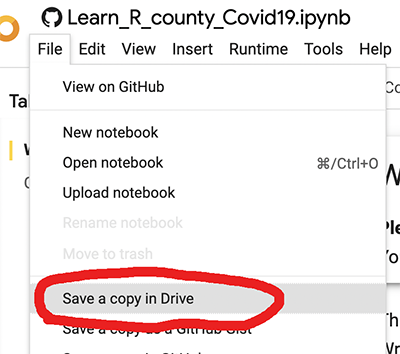



---



# Prepartion 1. Get familiar with Google CoLab

## The 'Code' and 'Text' cells
The code cell can be run by click the play icon on the upper-left corner of the code cells.

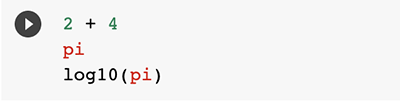

The menu on the top


## File, Edit, Insert, Runtime, Tools

## Table of contents and the left-sided panel

# Get weather from Chattanooga airport

### Get weather data from Local airport

See https://rdrr.io/cran/worldmet/man/importNOAA.html 

This installation may take about 10 minutes

In [ ]:
#This ensure worldmet is installed only once and save time.
packages <- c("worldmet")
install.packages(setdiff(packages, rownames(installed.packages()))) 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘jpeg’, ‘maps’, ‘lazyeval’, ‘gridExtra’, ‘latticeExtra’, ‘mapproj’, ‘hexbin’, ‘iterators’, ‘crosstalk’, ‘htmlwidgets’, ‘png’, ‘raster’, ‘sp’, ‘viridis’, ‘leaflet.providers’, ‘openair’, ‘doParallel’, ‘foreach’, ‘leaflet’




In [ ]:
library(worldmet)

## Find out the latitude and longitude of the location. CHANGE HERE FOR YOUR PROJECT

We can google for latitude and longitude for a location. 
For example,  "Fairfax county, VA latitude longitude"

The continent USA have Longitute West, and should be negative. 

For example, Lovell, TN is 35.03, -85.2. 

In [ ]:
#
# 35.1619° N, 85.1479° W, Hamilton, TN
# 33.7490° N, 84.3880° W, Atlanta, GA

#info <- getMeta(lat = 33.75, lon = -84.39) # Atlanta, GA
info <- getMeta(lat = 35.17, lon = -85.15) # Hamilton, TN
info

ERROR: ignored

Pick the first row

In [ ]:
local_code = paste( info$usaf[1], info$wban[1], sep='-')
local_code

[1] "723240-13882"

Now, get weather data from NOAA

In [ ]:
weatherLocal <- importNOAA(code = local_code, year = seq(1981, 2021, 5) )#will this work? 
tail(weatherLocal)

code,station,date,latitude,longitude,elev,ws,wd,air_temp,atmos_pres,⋯,ceil_hgt,cl_1,cl_2,cl_3,cl,cl_1_height,cl_2_height,cl_3_height,precip_6,pwc
<fct>,<fct>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
723240-13882,"CHATTANOOGA AIRPORT, TN US",2021-07-02 23:00:00,35.03362,-85.20044,204.2,4.1,330,28.3,1010.8,⋯,22000,2,4,NA,4,1676,7620,NA,NA,NA
723240-13882,"CHATTANOOGA AIRPORT, TN US",2021-07-03 00:00:00,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
723240-13882,"CHATTANOOGA AIRPORT, TN US",2021-07-03 01:00:00,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
723240-13882,"CHATTANOOGA AIRPORT, TN US",2021-07-03 02:00:00,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
723240-13882,"CHATTANOOGA AIRPORT, TN US",2021-07-03 03:00:00,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
723240-13882,"CHATTANOOGA AIRPORT, TN US",2021-07-03 04:00:00,35.03362,-85.20044,204.2,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [ ]:
names(weatherLocal)

[1] "code"        "station"     "date"        "latitude"    "longitude"  
 [6] "elev"        "ws"          "wd"          "air_temp"    "atmos_pres" 
[11] "visibility"  "dew_point"   "RH"          "ceil_hgt"    "cl_1"       
[16] "cl_2"        "cl_3"        "cl"          "cl_1_height" "cl_2_height"
[21] "cl_3_height" "precip_6"    "pwc"

Warning message:
“Removed 5 row(s) containing missing values (geom_path).”


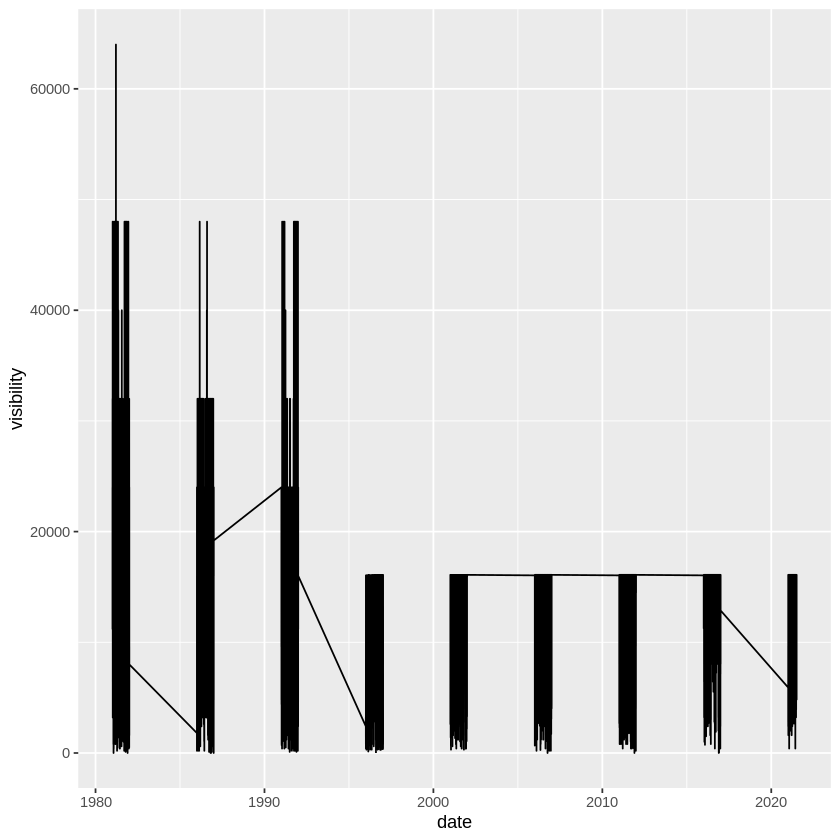

In [ ]:
library(ggplot2)
ggplot(weatherLocal, aes(x=date,y=visibility)) + geom_line() #+ stat_smooth(span=0.3)
# Visibility at Hamilton seem to have declined after 1995?!

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 14 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 5 row(s) containing missing values (geom_path).”


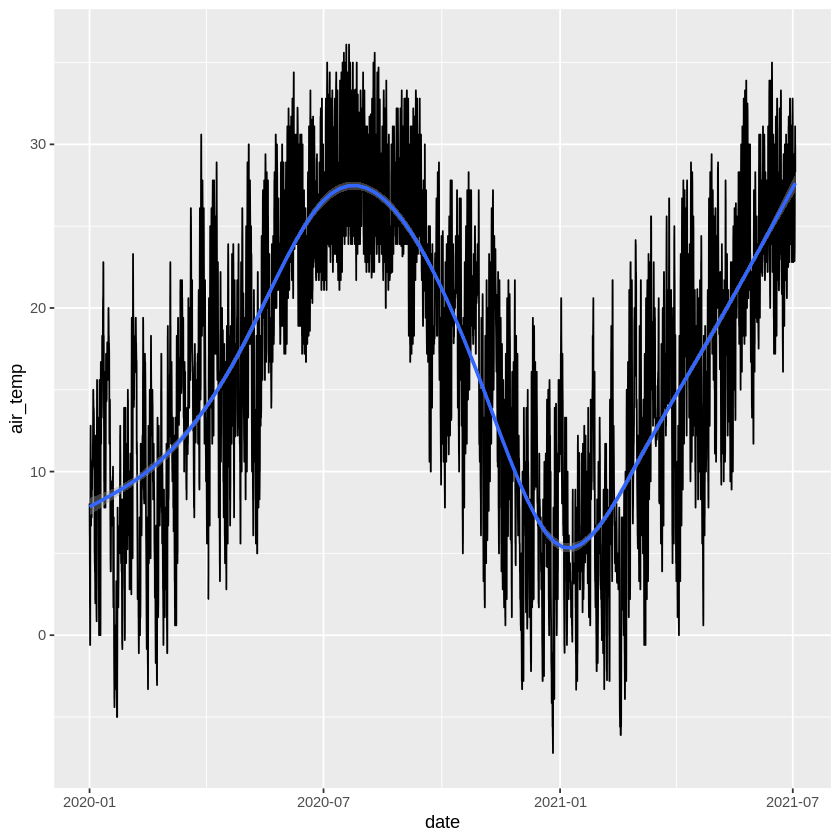

In [ ]:
ggplot(weatherLocal, aes(x=date,y=air_temp)) + geom_line() + stat_smooth(span=0.15)

Pick air temperature, dew_point, and relative humidity

In [ ]:
weatherLocal2 <- weatherLocal %>% dplyr::select( c('date', 'air_temp', 'dew_point', 'RH'))
head(weatherLocal2)

date,air_temp,dew_point,RH
<dttm>,<dbl>,<dbl>,<dbl>
2020-01-01 00:00:00,8.05,-1.4,51.69594
2020-01-01 01:00:00,7.80,-1.7,51.40293
2020-01-01 02:00:00,6.70,-2.2,53.40894
2020-01-01 03:00:00,6.10,-3.3,51.31885
2020-01-01 04:00:00,6.10,-3.9,49.08370
2020-01-01 05:00:00,4.40,-3.3,57.71365


### Reformate dates

In [ ]:
library(lubridate)

In [ ]:
clean_dates = gsub( " UTC ", "", weatherLocal2$date)
weatherLocal2$YMD = as.Date(clean_dates)
head(weatherLocal2)

date,air_temp,dew_point,RH,YMD
<dttm>,<dbl>,<dbl>,<dbl>,<date>
2020-01-01 00:00:00,8.05,-1.4,51.69594,2020-01-01
2020-01-01 01:00:00,7.80,-1.7,51.40293,2020-01-01
2020-01-01 02:00:00,6.70,-2.2,53.40894,2020-01-01
2020-01-01 03:00:00,6.10,-3.3,51.31885,2020-01-01
2020-01-01 04:00:00,6.10,-3.9,49.08370,2020-01-01
2020-01-01 05:00:00,4.40,-3.3,57.71365,2020-01-01


Calculate the daily average weather measurement 

In [ ]:
weatherLocal3 <- weatherLocal2 %>% group_by( YMD ) %>% summarise_if( is.numeric, mean, na.rm=TRUE)

tail( weatherLocal3 )

YMD,air_temp,dew_point,RH
<date>,<dbl>,<dbl>,<dbl>
2021-06-28,27.90000,20.77292,67.30881
2021-06-29,27.80625,21.16736,68.49641
2021-06-30,27.38542,20.37083,68.11781
2021-07-01,26.68542,20.66875,70.37188
2021-07-02,26.37569,20.35000,72.10810
2021-07-03,NaN,NaN,NaN


### Merge local weather data with Covid19 data

In [ ]:
tail(tb_GMCovidmycounty2)
tb_GMCovidmycounty2$YMD = ymd( row.names(tb_GMCovidmycounty2) )

,DailyCases,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-06-26,13,-8,7,140,-35,-18,-1
2021-06-27,0,-5,4,76,-53,-17,1
2021-06-28,13,-5,3,85,-52,-33,4
2021-06-29,1,-4,2,108,-47,-33,5
2021-06-30,27,-1,10,85,-44,-33,5
2021-07-01,7,0,13,65,-45,-33,6


In [ ]:
tail(tb_GMCovidmycounty2)

,DailyCases,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,YMD
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
2021-06-26,13,-8,7,140,-35,-18,-1,2021-06-26
2021-06-27,0,-5,4,76,-53,-17,1,2021-06-27
2021-06-28,13,-5,3,85,-52,-33,4,2021-06-28
2021-06-29,1,-4,2,108,-47,-33,5,2021-06-29
2021-06-30,27,-1,10,85,-44,-33,5,2021-06-30
2021-07-01,7,0,13,65,-45,-33,6,2021-07-01


The "merge()" is a uselful command

In [ ]:
tb_local=   merge(x=tb_GMCovidmycounty2, y=weatherLocal3, by= 'YMD', all.y=FALSE)
row.names( tb_local ) = tb_local$YMD
tail(tb_local)

,YMD,DailyCases,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,air_temp,dew_point,RH
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-06-26,2021-06-26,13,-8,7,140,-35,-18,-1,25.58958,17.72708,62.95459
2021-06-27,2021-06-27,0,-5,4,76,-53,-17,1,26.43958,21.10625,74.58574
2021-06-28,2021-06-28,13,-5,3,85,-52,-33,4,27.90000,20.77292,67.30881
2021-06-29,2021-06-29,1,-4,2,108,-47,-33,5,27.80625,21.16736,68.49641
2021-06-30,2021-06-30,27,-1,10,85,-44,-33,5,27.38542,20.37083,68.11781
2021-07-01,2021-07-01,7,0,13,65,-45,-33,6,26.68542,20.66875,70.37188


In [ ]:
cbind( names( tb_local ), seq(1:length(tb_local[1,])))

YMD,1
DailyCases,2
retail_and_recreation_percent_change_from_baseline,3
grocery_and_pharmacy_percent_change_from_baseline,4
parks_percent_change_from_baseline,5
transit_stations_percent_change_from_baseline,6
workplaces_percent_change_from_baseline,7
residential_percent_change_from_baseline,8
air_temp,9
dew_point,10
RH,11


In [ ]:
names(tb_local) = c("YMD", "DailyCases", "retail", "grocery", "parks", "transit", "workplace", "residential", "air_temp", "dew_point", "RH")
tail(tb_local)

,YMD,DailyCases,retail,grocery,parks,transit,workplace,residential,air_temp,dew_point,RH
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-06-26,2021-06-26,13,-8,7,140,-35,-18,-1,25.58958,17.72708,62.95459
2021-06-27,2021-06-27,0,-5,4,76,-53,-17,1,26.43958,21.10625,74.58574
2021-06-28,2021-06-28,13,-5,3,85,-52,-33,4,27.90000,20.77292,67.30881
2021-06-29,2021-06-29,1,-4,2,108,-47,-33,5,27.80625,21.16736,68.49641
2021-06-30,2021-06-30,27,-1,10,85,-44,-33,5,27.38542,20.37083,68.11781
2021-07-01,2021-07-01,7,0,13,65,-45,-33,6,26.68542,20.66875,70.37188


In [ ]:
startdate = mdy('3/10/2020')
enddate  = today(tzone='EST')
#enddate = mdy('12/25/2020')

tb_local2 <- tb_local %>% 
  #dplyr::select( c(1,2,)) %>%
  dplyr::filter( between(YMD, startdate, enddate))
  
tail( tb_local2 )


,YMD,DailyCases,retail,grocery,parks,transit,workplace,residential,air_temp,dew_point,RH
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2021-06-26,2021-06-26,13,-8,7,140,-35,-18,-1,25.58958,17.72708,62.95459
2021-06-27,2021-06-27,0,-5,4,76,-53,-17,1,26.43958,21.10625,74.58574
2021-06-28,2021-06-28,13,-5,3,85,-52,-33,4,27.90000,20.77292,67.30881
2021-06-29,2021-06-29,1,-4,2,108,-47,-33,5,27.80625,21.16736,68.49641
2021-06-30,2021-06-30,27,-1,10,85,-44,-33,5,27.38542,20.37083,68.11781
2021-07-01,2021-07-01,7,0,13,65,-45,-33,6,26.68542,20.66875,70.37188


### plot cases, mobility, and weather

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



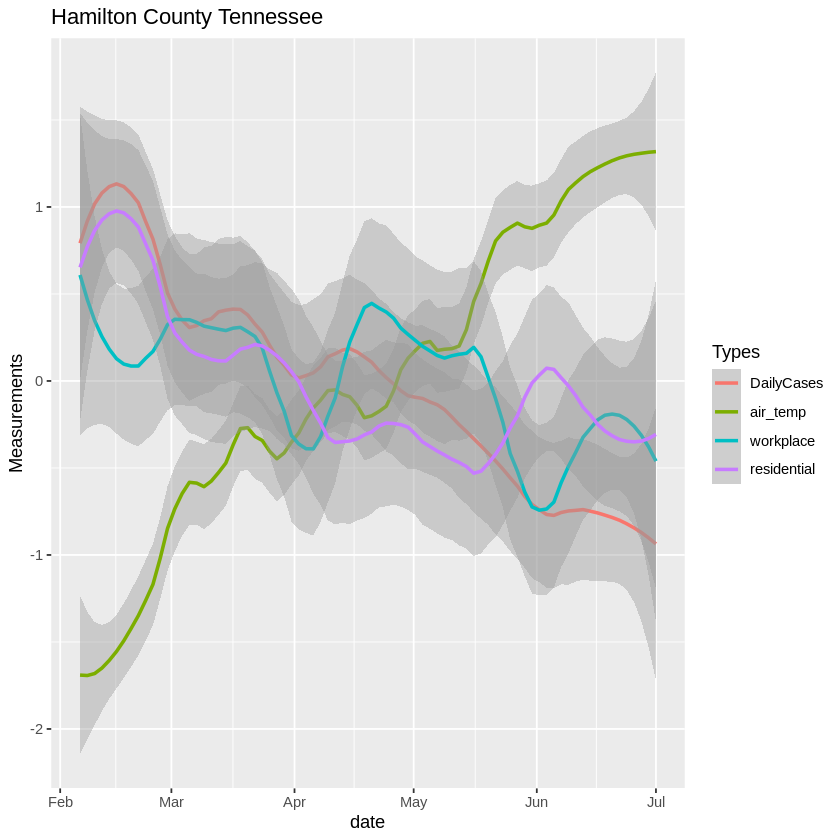

In [ ]:
tb_local_scaled = data.frame( as.matrix(scale(tb_local2[,2:11])) )
tb_local_scaled$date = tb_local2$YMD

df_tmp <- melt(tb_local_scaled, measure.vars = c("DailyCases", "air_temp", "workplace", "residential" ), value.name = 'Measurements', variable.name = 'Types')
plot <- ggplot(df_tmp, aes(x=date, y=Measurements, color=Types)) + stat_smooth(span=0.3)
plot + ggtitle( paste( myCounty, myState))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



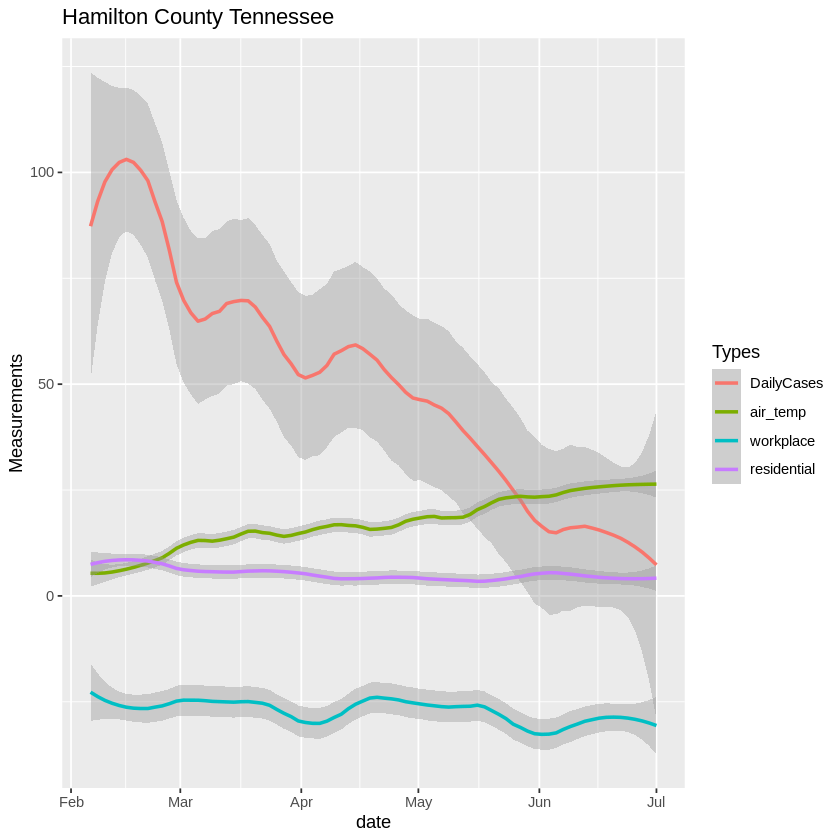

In [ ]:
tb_local_scaled = data.frame( as.matrix(tb_local2[,2:11]) )
tb_local_scaled$date = tb_local2$YMD

df_tmp <- melt(tb_local_scaled, measure.vars = c("DailyCases", "air_temp", "workplace", "residential" ), value.name = 'Measurements', variable.name = 'Types')
plot <- ggplot(df_tmp, aes(x=date, y=Measurements, color=Types)) + stat_smooth(span=0.3)
plot + ggtitle( paste( myCounty, myState))